In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
pc_erik    = 'SIFTER2/Erik_SIFTER_M02_EOF_2009_01'
pc_allhpa  = 'SIFTER2/PCs_noise/All_hpa_SIFTER2_M02_EOF_2009_01'
pc_400hpa  = 'SIFTER2/PCs_noise/400hpa_SIFTER2_M02_EOF_2009_01'
pc_600hpa  = 'SIFTER2/PCs_noise/600hpa_SIFTER2_M02_EOF_2009_01'
pc_700hpa  = 'SIFTER2/PCs_noise/700hpa_SIFTER2_M02_EOF_2009_01'
pc_800hpa  = 'SIFTER2/PCs_noise/800hpa_SIFTER2_M02_EOF_2009_01'
pc_1000hpa = 'SIFTER2/PCs_noise/1000hpa_SIFTER2_M02_EOF_2009_01'

data_400   = hdf.File(pc_400hpa,'r')
data_600   = hdf.File(pc_600hpa,'r')
data_700   = hdf.File(pc_700hpa,'r')
data_800   = hdf.File(pc_800hpa,'r')
data_1000  = hdf.File(pc_1000hpa,'r')
data_all   = hdf.File(pc_allhpa,'r')
data_erik  = hdf.File(pc_erik,'r')

In [3]:
files = [pc_1000hpa,pc_erik]
for f in files:
    print f
    data        = hdf.File(f,'r') 
    list_items_in_group = data.items()
    print list_items_in_group

SIFTER2/PCs_noise/1000hpa_SIFTER2_M02_EOF_2009_01
[(u'EOF', <HDF5 dataset "EOF": shape (10, 120), type "<f8">), (u'EOF_var', <HDF5 dataset "EOF_var": shape (10, 120), type "<f8">), (u'wavelength', <HDF5 dataset "wavelength": shape (120,), type "<f8">)]
SIFTER2/Erik_SIFTER_M02_EOF_2009_01
[(u'EOF', <HDF5 dataset "EOF": shape (10, 120), type "<f8">), (u'EOF_var', <HDF5 dataset "EOF_var": shape (10, 120), type "<f8">), (u'wavelength', <HDF5 dataset "wavelength": shape (120,), type "<f8">)]


In [4]:
EOF_400          = (np.array(data_400.get('EOF')))
EOF_var_400      = (np.array(data_400.get('EOF_var')))

EOF_600          = (np.array(data_600.get('EOF')))
EOF_var_600      = (np.array(data_600.get('EOF_var')))

EOF_700          = (np.array(data_700.get('EOF')))
EOF_var_700      = (np.array(data_700.get('EOF_var')))

EOF_800          = (np.array(data_800.get('EOF')))
EOF_var_800      = (np.array(data_800.get('EOF_var')))

EOF_1000         = (np.array(data_1000.get('EOF')))
EOF_var_1000     = (np.array(data_1000.get('EOF_var')))

EOF_all          = (np.array(data_all.get('EOF')))
EOF_var_all      = (np.array(data_all.get('EOF_var')))

EOF_erik         = (np.array(data_erik.get('EOF')))
EOF_var_erik     = (np.array(data_erik.get('EOF_var')))
wavelength       = (np.array(data_erik.get('wavelength')))

In [9]:
var_list = [EOF_var_400,EOF_var_600,EOF_var_700,EOF_var_800,EOF_var_1000,EOF_var_erik,EOF_var_all]
EOF_var_400[0].shape

(120,)

In [6]:
from __future__ import division

columns   = ['400Hpa','600Hpa','700hpa','800hpa','1000hpa','1000hpa(Erik)','All Hpa']
d         = np.array(np.ones((6,len(columns))))
df        = pd.DataFrame(data=d,columns=columns)

for k,i in enumerate(var_list):
    pc      = i
    pcs_var = []
    summ    = []
    for s in range(len(pc)):
        summ.append(pc[s][0])

    for j in range (6):
        #print pc[j].mean()
        pcs_var.append(pc[j].mean()/sum(summ)*100)
    df[columns[k]] = pcs_var
df


,400Hpa,600Hpa,700hpa,800hpa,1000hpa,1000hpa(Erik),All Hpa
0,99.344228,99.423339,99.455416,99.456693,99.538085,99.513714,99.397646
1,0.626739,0.551156,0.522496,0.523063,0.444530,0.472187,0.528536
2,0.008368,0.006904,0.006754,0.005896,0.006093,0.005905,0.052412
3,0.003804,0.003751,0.002604,0.002428,0.002362,0.001418,0.007174
4,0.003312,0.002976,0.002557,0.002401,0.001958,0.001328,0.003474
5,0.003190,0.002695,0.002350,0.002149,0.001611,0.001160,0.002418


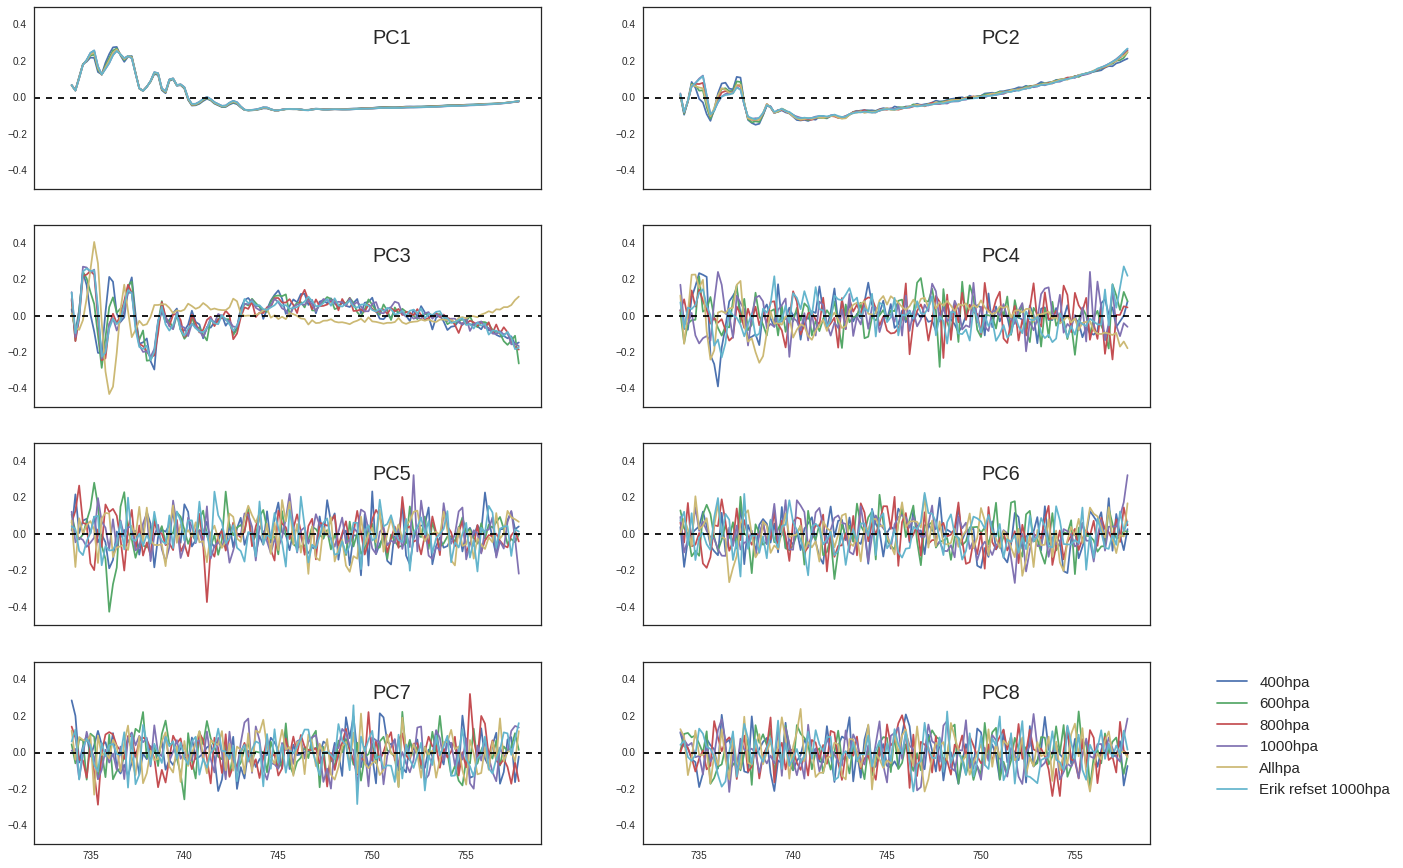

In [14]:
fig     = plt.figure(1,figsize = (20,15))
seaborn.set_style('white')

pos = 421

ax1 = plt.subplot(pos)
ax2 = plt.subplot(pos+1,sharex=ax1,sharey=ax1)
ax3 = plt.subplot(pos+2,sharex=ax1,sharey=ax1)
ax4 = plt.subplot(pos+3,sharex=ax1,sharey=ax1)
ax5 = plt.subplot(pos+4,sharex=ax1,sharey=ax1)
ax6 = plt.subplot(pos+5,sharex=ax1,sharey=ax1)
ax7 = plt.subplot(pos+6,sharex=ax1,sharey=ax1)
ax8 = plt.subplot(pos+7,sharex=ax1,sharey=ax1)

#'''
ax1.plot(wavelength,EOF_400[0],label='400hpa')
ax1.plot(wavelength,EOF_600[0],label='600hpa')
ax1.plot(wavelength,EOF_800[0],label='800hpa')#'''
ax1.plot(wavelength,EOF_1000[0],label='1000hpa')
ax1.plot(wavelength,EOF_all[0],label='Allhpa')
ax1.plot(wavelength,EOF_erik[0],label='Erik refset 1000hpa')
plt.setp(ax1.get_xticklabels(), visible=False)
#'''
ax2.plot(wavelength,EOF_400[1],label='400hpa')
ax2.plot(wavelength,EOF_600[1],label='600hpa')
ax2.plot(wavelength,EOF_800[1],label='800hpa')#'''
ax2.plot(wavelength,EOF_1000[1],label='1000hpa')
ax2.plot(wavelength,EOF_all[1],label='Allhpa')
ax2.plot(wavelength,EOF_erik[1],label='Erik refset 1000hpa')
plt.setp(ax2.get_xticklabels(), visible=False)
#'''
ax3.plot(wavelength,EOF_400[2],label='400hpa')
ax3.plot(wavelength,EOF_600[2],label='600hpa')
ax3.plot(wavelength,EOF_800[2],label='800hpa')#'''
ax3.plot(wavelength,EOF_1000[2],label='1000hpa')
ax3.plot(wavelength,EOF_all[2],label='Allhpa')
ax3.plot(wavelength,EOF_erik[2],label='Erik refset 1000hpa')
plt.setp(ax3.get_xticklabels(), visible=False)
#'''
ax4.plot(wavelength,EOF_400[3],label='400hpa')
ax4.plot(wavelength,EOF_600[3],label='600hpa')
ax4.plot(wavelength,EOF_800[3],label='800hpa')#'''
ax4.plot(wavelength,EOF_1000[3],label='1000hpa')
ax4.plot(wavelength,EOF_all[3],label='Allhpa')
ax4.plot(wavelength,EOF_erik[3],label='Erik refset 1000hpa')
plt.setp(ax4.get_xticklabels(), visible=False)
#'''
ax5.plot(wavelength,EOF_400[4],label='400hpa')
ax5.plot(wavelength,EOF_600[4],label='600hpa')
ax5.plot(wavelength,EOF_800[4],label='800hpa')#'''
ax5.plot(wavelength,EOF_1000[4],label='1000hpa')
ax5.plot(wavelength,EOF_all[4],label='Allhpa')
ax5.plot(wavelength,EOF_erik[4],label='Erik refset 1000hpa')
plt.setp(ax5.get_xticklabels(), visible=False)
#'''
ax6.plot(wavelength,EOF_400[5],label='400hpa')
ax6.plot(wavelength,EOF_600[5],label='600hpa')
ax6.plot(wavelength,EOF_800[5],label='800hpa')#'''
ax6.plot(wavelength,EOF_1000[5],label='1000hpa')
ax6.plot(wavelength,EOF_all[5],label='Allhpa')
ax6.plot(wavelength,EOF_erik[5],label='Erik refset 1000hpa')
plt.setp(ax6.get_xticklabels(), visible=False)
#'''
ax7.plot(wavelength,EOF_400[6],label='400hpa')
ax7.plot(wavelength,EOF_600[6],label='600hpa')
ax7.plot(wavelength,EOF_800[6],label='800hpa')#'''
ax7.plot(wavelength,EOF_1000[6],label='1000hpa')
ax7.plot(wavelength,EOF_all[6],label='Allhpa')
ax7.plot(wavelength,EOF_erik[6],label='Erik refset 1000hpa')
plt.setp(ax7.get_xticklabels(), fontsize=10)
#'''
ax8.plot(wavelength,EOF_400[7],label='400hpa')
ax8.plot(wavelength,EOF_600[7],label='600hpa')
ax8.plot(wavelength,EOF_800[7],label='800hpa')#'''
ax8.plot(wavelength,EOF_1000[7],label='1000hpa')
ax8.plot(wavelength,EOF_all[7],label='Allhpa')
ax8.plot(wavelength,EOF_erik[7],label='Erik refset 1000hpa')
plt.setp(ax8.get_xticklabels(), fontsize=10)

plt.xlim(732, 759)
#plt.legend(loc='upper left')

'''
#ax1.annotate('PC1 var = %.3f'%(var[0]), xy=(750, 0.25),fontsize=20)
#ax2.annotate('PC2 var = %.3f'%(var[1]), xy=(750, 0.25),fontsize=20)
#ax3.annotate('PC3 var = %.3f'%(var[2]), xy=(750, 0.25),fontsize=20)
#ax4.annotate('PC4 var = %.3f'%(var[3]), xy=(750, 0.25),fontsize=20)
'''
x = 750
y = 0.3

ax1.annotate('PC1', xy=(x,y),fontsize=20)
ax2.annotate('PC2', xy=(x,y),fontsize=20)
ax3.annotate('PC3', xy=(x,y),fontsize=20)
ax4.annotate('PC4', xy=(x,y),fontsize=20)
ax5.annotate('PC5', xy=(x,y),fontsize=20)
ax6.annotate('PC6', xy=(x,y),fontsize=20)
ax7.annotate('PC7', xy=(x,y),fontsize=20)
ax8.annotate('PC8', xy=(x,y),fontsize=20)

gg = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for i in gg:
    i.axhline(0,color='black',linestyle='--')
ax8.legend(bbox_to_anchor=(1.5,1),fontsize=15)    
plt.show()

#fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/PrincipalComponentsComparison.png',bbox_inches='tight',DPI=1000)
fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/PrincipalComponentsALLComparison.png',bbox_inches='tight',DPI=1000)

Axes(0.125,0.766379;0.352273x0.133621)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
0
Axes(0.125,0.731522;0.352273x0.168478)
Axes(0.547727,0.766379;0.352273x0.133621)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.547727,0.731522;0.352273x0.168478)
Axes(0.125,0.606034;0.352273x0.133621)
Axes(0.125,0.529348;0.352273x0.168478)
Axes(0.125,0.529348;0.352273x0.168478)
Axes(0.125,0.529348;0.352273x0.168478)
Axes(0.125,0.529

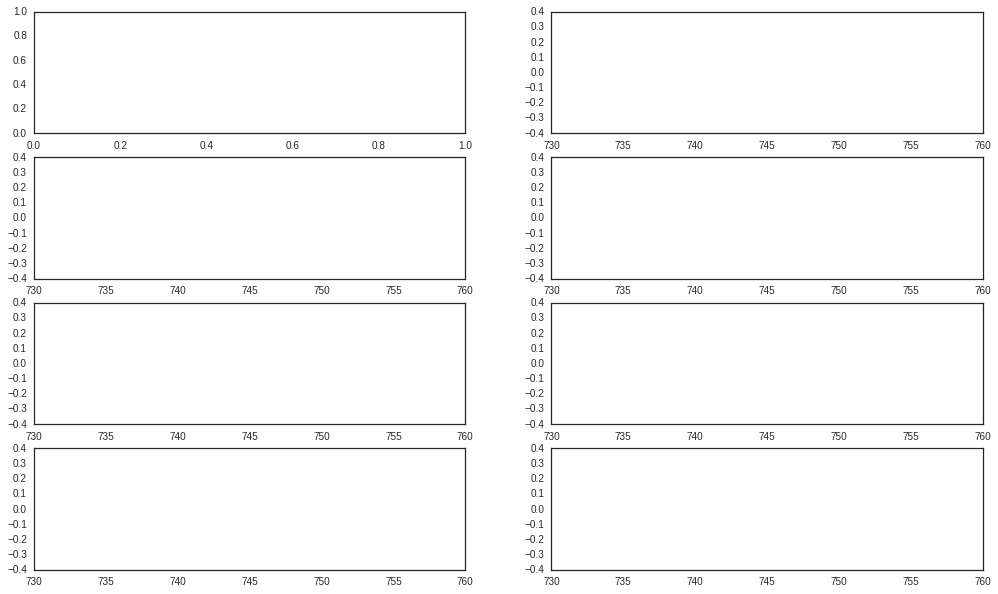

In [64]:
fig     = plt.figure(1,figsize = (17,10))
seaborn.set_style('white')

pos      = 421
gg       = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
EOF_list = [EOF_400,EOF_600,EOF_800,EOF_1000,EOF_all,EOF_erik] 
label    = ['400','600','800','1000','All','Erik']

for k,i in enumerate(gg):
    print i
    for j in range(9):

        if k == 0: 
            print k
            i = plt.subplot(pos)
            print i
        else:
            i = plt.subplot(pos,sharex=ax1,sharey=ax1)
            print i

    pos += 1
    
plt.show()